# Chapter 6 - Linear Model Selection and Regularization

In [1]:
# %load ../standard_import.txt; 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

# When True, IPython notebook will use html representation for pandas objects (if it is available). [default: True]
# pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('seaborn-white') # stylesheets defined in Matplotlib.

# Lab 2: Ridge Regression and the Lasso

In [2]:
# In R, exported the dataset from package 'ISLR' to a csv file.
df = pd.read_csv('Data/Hitters/Hitters.csv', index_col=0).dropna()
df.index.name = 'Player'
#df.info()

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
df.shape

(263, 20)

In [5]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
#dummies.info()
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
Player,,,,,,
-Alan Ashby,0,1,0,1,0,1
-Alvin Davis,1,0,0,1,1,0
-Andre Dawson,0,1,1,0,0,1
-Andres Galarraga,0,1,1,0,0,1
-Alfredo Griffin,1,0,0,1,1,0


In [6]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
# Note: axis=1 denotes that we are referring to a column, not a row
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
#X.info()

In [7]:
X.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
Player,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
-Alvin Davis,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
-Andre Dawson,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
-Andres Galarraga,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
-Alfredo Griffin,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [7]:
X.shape

(263, 19)

#### executed the R code and downloaded the exact same training/test sets used in the book.

In [8]:
X_train = pd.read_csv('data/Hitters/Hitters_X_train.csv', index_col=0)
y_train = pd.read_csv('data/Hitters/Hitters_y_train.csv', index_col=0)
X_test = pd.read_csv('data/Hitters/Hitters_X_test.csv', index_col=0)
y_test = pd.read_csv('data/Hitters/Hitters_y_test.csv', index_col=0)

### 6.6.1 Ridge Regression

### Scikit-learn

scikit-learn Ridge regression (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) uses linear least squares with L2 regularization. 

The __sklearn Ridge()__ function has the standard L2 penalty:
### $$ \lambda |\beta|^2_2 $$


In [9]:
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [10]:
alphas = 10**np.linspace(10,-2,100)
print(alphas)

[1.00000000e+10 7.56463328e+09 5.72236766e+09 4.32876128e+09
 3.27454916e+09 2.47707636e+09 1.87381742e+09 1.41747416e+09
 1.07226722e+09 8.11130831e+08 6.13590727e+08 4.64158883e+08
 3.51119173e+08 2.65608778e+08 2.00923300e+08 1.51991108e+08
 1.14975700e+08 8.69749003e+07 6.57933225e+07 4.97702356e+07
 3.76493581e+07 2.84803587e+07 2.15443469e+07 1.62975083e+07
 1.23284674e+07 9.32603347e+06 7.05480231e+06 5.33669923e+06
 4.03701726e+06 3.05385551e+06 2.31012970e+06 1.74752840e+06
 1.32194115e+06 1.00000000e+06 7.56463328e+05 5.72236766e+05
 4.32876128e+05 3.27454916e+05 2.47707636e+05 1.87381742e+05
 1.41747416e+05 1.07226722e+05 8.11130831e+04 6.13590727e+04
 4.64158883e+04 3.51119173e+04 2.65608778e+04 2.00923300e+04
 1.51991108e+04 1.14975700e+04 8.69749003e+03 6.57933225e+03
 4.97702356e+03 3.76493581e+03 2.84803587e+03 2.15443469e+03
 1.62975083e+03 1.23284674e+03 9.32603347e+02 7.05480231e+02
 5.33669923e+02 4.03701726e+02 3.05385551e+02 2.31012970e+02
 1.74752840e+02 1.321941

### Use all the data

In [11]:
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a) # alpha: Regularization strength
    # scale(X) standardizes the variables so that they are on the same scale, shifting the distribution of 
    # each attribute to have a mean of zero and a standard deviation of one 
    ridge.fit(scale(X), y)   
    coefs.append(ridge.coef_)
print(coefs)

[array([ 4.67481502e-06,  5.19471690e-06,  4.06208411e-06,  4.97189864e-06,
        5.32239967e-06,  5.25620591e-06,  4.74451655e-06,  6.23041096e-06,
        6.50010006e-06,  6.21614453e-06,  6.66314034e-06,  6.71391785e-06,
        5.80039490e-06,  3.55824107e-06,  3.01210710e-07, -6.39542829e-08,
       -1.69122992e-07, -2.27972531e-06, -3.35651034e-08]), array([ 6.17982997e-06,  6.86710965e-06,  5.36983577e-06,  6.57255703e-06,
        7.03589872e-06,  6.94839450e-06,  6.27197122e-06,  8.23623609e-06,
        8.59274921e-06,  8.21737673e-06,  8.80827885e-06,  8.87540373e-06,
        7.66778019e-06,  4.70378513e-06,  3.98182816e-07, -8.45438062e-08,
       -2.23570566e-07, -3.01366263e-06, -4.43710380e-08]), array([ 8.16937088e-06,  9.07791418e-06,  7.09860623e-06,  8.68853294e-06,
        9.30104329e-06,  9.18536795e-06,  8.29117607e-06,  1.08878185e-05,
        1.13591078e-05,  1.08628875e-05,  1.16440253e-05,  1.17327604e-05,
        1.01363533e-05,  6.21812682e-06,  5.26374222e-

In [13]:
ridge = Ridge()
coefs = []

stdsc = StandardScaler() # use StandardScaler() instead of scale()
X_std = stdsc.fit_transform(X)
for a in alphas:
    ridge.set_params(alpha=a) # alpha: Regularization strength
    ridge.fit(X_std, y)   
    coefs.append(ridge.coef_)
print(coefs)

[array([ 4.67481502e-06,  5.19471690e-06,  4.06208411e-06,  4.97189864e-06,
        5.32239967e-06,  5.25620591e-06,  4.74451655e-06,  6.23041096e-06,
        6.50010006e-06,  6.21614453e-06,  6.66314034e-06,  6.71391785e-06,
        5.80039490e-06,  3.55824107e-06,  3.01210710e-07, -6.39542829e-08,
       -1.69122992e-07, -2.27972531e-06, -3.35651034e-08]), array([ 6.17982997e-06,  6.86710965e-06,  5.36983577e-06,  6.57255703e-06,
        7.03589872e-06,  6.94839450e-06,  6.27197122e-06,  8.23623609e-06,
        8.59274921e-06,  8.21737673e-06,  8.80827885e-06,  8.87540373e-06,
        7.66778019e-06,  4.70378513e-06,  3.98182816e-07, -8.45438062e-08,
       -2.23570566e-07, -3.01366263e-06, -4.43710380e-08]), array([ 8.16937088e-06,  9.07791418e-06,  7.09860623e-06,  8.68853294e-06,
        9.30104329e-06,  9.18536795e-06,  8.29117607e-06,  1.08878185e-05,
        1.13591078e-05,  1.08628875e-05,  1.16440253e-05,  1.17327604e-05,
        1.01363533e-05,  6.21812682e-06,  5.26374222e-

(0.002511886431509582, 39810717055.34969)


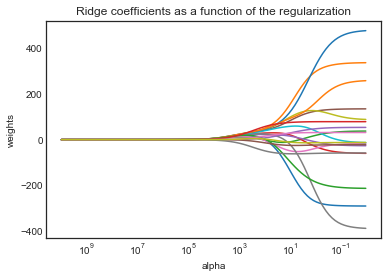

In [14]:
ax = plt.gca()
# MATLAB, and pyplot, have the concept of the current figure and the current axes. 
# All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), 
# and gcf() returns the current figure (matplotlib.figure.Figure instance). 
# Normally, you don’t have to worry about this, because it is all taken care of behind the scenes. 
ax.plot(alphas, coefs)
ax.set_xscale('log') # set the x-axis to log-scale
print(ax.get_xlim())
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis; get_xlim() returns the current x-axis limits as the tuple (left, right).
plt.axis('tight') #  use when the left and right side is a waste of space
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

The above plot shows that the Ridge coefficients get larger when we decrease alpha.

### Use Train Data and Test Data
#### Alpha = 4

In [24]:
stdsc = StandardScaler() # use StandardScaler() instead of scale()
# we fit the StandardScaler() on the training data and use thoes parameters to transform the test set.
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

ridge2 = Ridge(alpha=4)
ridge2.fit(X_train_std, y_train)
pred = ridge2.predict(X_test_std)
mean_squared_error(y_test, pred)

97383.68965102117

#### Alpha = $10^{10}$ 
This big penalty shrinks the coefficients to a very large degree and makes the model more biased, resulting in a higher MSE.

In [26]:
ridge2.set_params(alpha=10**10)
ridge2.fit(X_train_std, y_train)
pred = ridge2.predict(X_test_std)
mean_squared_error(y_test, pred)

193253.09707951872

#### Compute the regularization path using RidgeCV
Alpha value is determined from training set using cross-valiation.

In [27]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error') 
# when cv=None, use the efficient Leave-One-Out cross-validation
ridgecv.fit(X_train_std, y_train)

RidgeCV(alphas=array([1.00000e+10, 7.56463e+09, ..., 1.32194e-02, 1.00000e-02]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [28]:
ridgecv.alpha_

100.0

In [29]:
ridge2.set_params(alpha=ridgecv.alpha_)
ridge2.fit(X_train_std, y_train)
mean_squared_error(y_test, ridge2.predict(X_test_std))

96417.8136429078

In [30]:
pd.Series(ridge2.coef_.flatten(), index=X.columns) # note that parameters are non-zero.

AtBat           5.559649
Hits           22.893732
HmRun          19.431685
Runs           19.859330
RBI            21.074810
Walks          58.870478
Years          -6.787442
CAtBat         20.752173
CHits          30.645308
CHmRun         13.816343
CRuns          38.037441
CRBI           20.334967
CWalks         24.582540
PutOuts        16.848101
Assists       -46.965887
Errors         57.761412
League_N        6.213095
Division_W     -0.816456
NewLeague_N    11.254522
dtype: float64

In [31]:
print(ridge2.coef_)
print(ridge2.coef_.flatten())

[[  5.55964882  22.89373153  19.43168485  19.85932975  21.07480972
   58.87047796  -6.7874424   20.75217271  30.6453081   13.81634298
   38.03744091  20.33496746  24.58254025  16.84810123 -46.96588674
   57.76141176   6.21309462  -0.81645599  11.2545223 ]]
[  5.55964882  22.89373153  19.43168485  19.85932975  21.07480972
  58.87047796  -6.7874424   20.75217271  30.6453081   13.81634298
  38.03744091  20.33496746  24.58254025  16.84810123 -46.96588674
  57.76141176   6.21309462  -0.81645599  11.2545223 ]


### 6.6.2 The Lasso

### Scikit-learn



For sklearn __Lasso()__ function, the standard L1 penalty is: L1 norm. http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

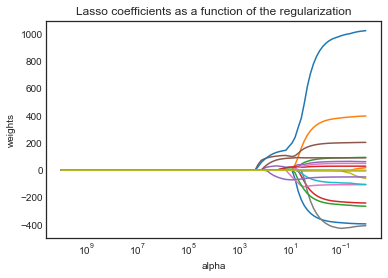

In [32]:
lasso = Lasso(max_iter=10000)  # max_iter: The maximum number of iterations, defualt value = 1000
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_std, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [33]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000) # If alphas is None, alphas are set automatically: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
lassocv.fit(X_train_std, y_train.values.ravel()) # y_train needs to be converted to 1d array

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [34]:
type(y_train)

pandas.core.frame.DataFrame

In [35]:
y_train.values

array([[1220.   ],
       [ 662.5  ],
       [1183.333],
       [ 740.   ],
       [ 320.   ],
       [ 341.667],
       [ 245.   ],
       [ 670.   ],
       [ 575.   ],
       [ 175.   ],
       [ 700.   ],
       [1350.   ],
       [2127.333],
       [ 600.   ],
       [ 130.   ],
       [ 200.   ],
       [ 800.   ],
       [1150.   ],
       [ 400.   ],
       [ 190.   ],
       [ 105.   ],
       [ 105.   ],
       [ 145.   ],
       [  90.   ],
       [ 600.   ],
       [ 200.   ],
       [  91.5  ],
       [ 733.333],
       [ 400.   ],
       [1175.   ],
       [1008.333],
       [1800.   ],
       [ 775.   ],
       [ 340.   ],
       [ 235.   ],
       [ 525.   ],
       [ 175.   ],
       [ 625.   ],
       [  90.   ],
       [ 400.   ],
       [ 700.   ],
       [ 125.   ],
       [ 875.   ],
       [  80.   ],
       [ 365.   ],
       [ 750.   ],
       [  70.   ],
       [ 175.   ],
       [ 920.   ],
       [  75.   ],
       [ 325.   ],
       [1940.   ],
       [ 155

In [36]:
print(y_train.values.ravel())
print(type(y_train.values.ravel()))

[1220.     662.5   1183.333  740.     320.     341.667  245.     670.
  575.     175.     700.    1350.    2127.333  600.     130.     200.
  800.    1150.     400.     190.     105.     105.     145.      90.
  600.     200.      91.5    733.333  400.    1175.    1008.333 1800.
  775.     340.     235.     525.     175.     625.      90.     400.
  700.     125.     875.      80.     365.     750.      70.     175.
  920.      75.     325.    1940.     155.     286.667  775.     776.667
  110.     430.     630.     385.     450.     275.     191.     260.
  640.     190.     737.5    202.5    135.    1600.     750.     780.
 1670.     925.     250.      68.     500.     595.     200.     210.
  350.     560.     500.     325.     326.667  815.      75.     765.
   90.    1450.     415.     512.5    250.     140.     110.     195.
 2460.     431.5   1260.     750.     450.     210.     416.667  420.
  297.5    305.      70.     300.     750.     487.5    385.     773.333
  850.    1041

In [37]:
lassocv.alpha_

30.013822564464284

In [38]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train_std, y_train)
mean_squared_error(y_test, lasso.predict(X_test_std)) # the result is slightly worse than Ridge Regression's result

101650.15052295614

In [39]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

AtBat            0.000000
Hits             0.000000
HmRun            2.154219
Runs             0.000000
RBI             30.835560
Walks          104.071528
Years           -0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun           0.000000
CRuns          132.858095
CRBI             0.000000
CWalks           0.000000
PutOuts          1.896185
Assists        -51.058752
Errors          76.779641
League_N         0.000000
Division_W       0.000000
NewLeague_N      0.000000
dtype: float64

# Lab 3: PCR and PLS Regression

### 6.7.1 Principal Components Regression

Scikit-klearn does not have an implementation of PCA and regression combined like the 'pls' package in R.
https://cran.r-project.org/web/packages/pls/vignettes/pls-manual.pdf

### Fitting PCA with all data

In [40]:
pca = PCA() # http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
X_reduced = pca.fit_transform(scale(X)) # Fit the model with X and apply the dimensionality reduction on X.

#print(pca.components_.shape)
#pd.DataFrame(pca.components_.T).loc[:4,:5]

In [36]:
pd.DataFrame(pca.components_.T) # pricipal component loading vectors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.198290,-0.383784,0.088626,0.031967,0.028117,-0.070646,0.107044,0.269810,-0.012183,0.145621,0.097328,0.103150,-0.039850,0.306248,0.532433,-0.510331,0.139342,-0.106790,0.053777
1,0.195861,-0.377271,0.074032,0.017982,-0.004652,-0.082240,0.130026,0.388722,-0.061604,0.130476,0.014433,0.121009,0.003593,0.210616,-0.023442,0.720168,-0.167363,0.043568,-0.097782
2,0.204369,-0.237136,-0.216186,-0.235831,0.077660,-0.149646,-0.505833,-0.226278,0.127422,-0.351111,-0.202190,-0.314852,-0.108689,-0.001353,0.355455,0.200408,0.047702,-0.058377,-0.024805
3,0.198337,-0.377721,-0.017166,-0.049942,-0.038536,-0.136660,0.201764,0.114518,-0.171230,0.032245,-0.312187,-0.321700,-0.381219,-0.266583,-0.468300,-0.220518,0.140946,0.047050,0.059145
4,0.235174,-0.314531,-0.073085,-0.138985,0.024299,-0.111675,-0.319440,0.005082,0.131146,-0.172233,0.243415,0.347752,0.440143,-0.007486,-0.461468,-0.237366,-0.106688,0.063998,0.019351
5,0.208924,-0.229606,0.045636,-0.130615,-0.032495,-0.019480,0.558420,-0.623342,-0.021438,-0.120940,0.176393,0.185278,0.041020,-0.237940,0.176549,0.102541,-0.042240,0.006655,-0.018030
6,0.282575,0.262402,0.034581,0.095312,-0.010361,0.033243,-0.012029,0.138314,-0.010645,-0.512507,0.191547,0.354594,-0.605010,0.086080,-0.066239,-0.024135,-0.095586,-0.085780,0.020309
7,0.330463,0.192904,0.083574,0.091114,0.011716,0.024377,0.012057,0.147030,-0.054657,-0.101137,-0.030238,-0.062390,0.148585,-0.168155,0.157743,-0.056835,0.182264,0.720128,-0.409277
8,0.330742,0.182899,0.086251,0.083751,0.008524,0.029395,0.020000,0.194547,-0.094925,-0.077220,-0.029848,-0.083475,0.266807,-0.290311,0.136632,0.110442,0.031999,-0.003477,0.770272
9,0.318979,0.126297,-0.086272,-0.074278,0.032652,-0.040780,-0.228830,-0.249490,0.167949,0.650534,0.079790,0.074114,-0.330107,0.039828,-0.009399,-0.026816,-0.291752,0.254301,0.166104


The above loadings are the same as in R.

In [43]:
print(X_reduced.shape)
#pd.DataFrame(X_reduced).loc[:4,:5]

(263, 19)


In [44]:
pd.DataFrame(X_reduced) # principal component scores

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.009649,1.870522,1.265145,-0.935481,1.109636,1.211972,-0.065146,-0.098249,-0.252423,-0.637101,0.459341,0.615860,-0.478088,0.388407,0.063596,0.144790,0.080216,0.038140,-0.019250
1,0.411434,-2.429422,-0.909193,-0.264212,1.232031,1.826617,0.359893,-1.199383,-0.371820,0.015215,0.176235,0.080529,0.403483,-0.019386,0.065149,0.161064,0.044343,0.014834,-0.003395
2,3.466822,0.825947,0.555469,-1.616726,-0.857488,-1.028712,-0.999385,0.844247,0.197379,0.770490,0.055645,0.104938,0.021605,-0.376197,0.234291,0.011526,-0.218283,0.037825,-0.066501
3,-2.558317,-0.230984,0.519642,-2.176251,-0.820301,1.491696,-0.276141,0.207094,0.414956,0.136842,-0.085375,-0.146217,0.142172,0.028975,0.042459,0.053043,-0.044443,0.010360,-0.013582
4,1.027702,-1.573537,1.331382,3.494004,0.983427,0.513675,0.140456,0.989707,-0.661933,-0.217565,0.111259,0.191244,-0.302426,-0.090770,0.043811,0.012300,-0.050593,0.126036,-0.071035
5,-3.980657,1.507279,-0.155479,0.369840,-1.209334,0.033514,0.013007,-0.540315,0.121838,0.411966,-1.198707,0.538882,0.106017,-0.238849,0.193108,-0.057444,0.052532,-0.024036,0.025065
6,-3.451719,0.599989,-0.626476,1.999776,0.807026,0.205971,-0.056137,0.395305,0.719654,0.421149,0.039300,-0.022136,0.178050,0.172087,-0.087011,-0.048078,-0.014070,-0.028050,0.000720
7,-3.432380,0.113542,1.999750,0.767813,1.016092,-0.272797,-1.204274,-0.098152,0.035413,0.359129,-0.010706,-0.201662,0.115068,0.284426,0.006564,0.064950,-0.059816,-0.067180,-0.004802
8,3.899707,1.947870,-1.820475,-0.026713,-1.137128,-0.821045,0.314217,-1.192292,0.444240,0.510195,0.217092,0.221224,0.130075,0.644068,-0.005987,-0.108769,0.131745,-0.057934,-0.022755
9,3.174812,-2.392365,0.794468,2.569006,-0.947328,-0.061251,-0.375009,-0.425686,-0.065025,-0.498544,-0.533286,-0.717679,-0.283230,-0.272698,-0.290593,-0.094599,0.054802,-0.028549,0.027711


The above principal components are the same as in R.

In [45]:
# Variance explained by the principal components
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([38.31, 60.15, 70.84, 79.03, 84.29, 88.63, 92.26, 94.96, 96.28,
       97.25, 97.97, 98.64, 99.14, 99.46, 99.73, 99.88, 99.95, 99.98,
       99.99])

In [46]:
np.round(pca.explained_variance_ratio_, decimals=4)

array([3.831e-01, 2.184e-01, 1.069e-01, 8.190e-02, 5.260e-02, 4.340e-02,
       3.630e-02, 2.700e-02, 1.320e-02, 9.700e-03, 7.200e-03, 6.700e-03,
       5.000e-03, 3.200e-03, 2.700e-03, 1.500e-03, 7.000e-04, 3.000e-04,
       1.000e-04])

For the most common use cases, you can designate a scorer object with the scoring parameter. All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.(http://scikit-learn.org/stable/modules/model_evaluation.html)

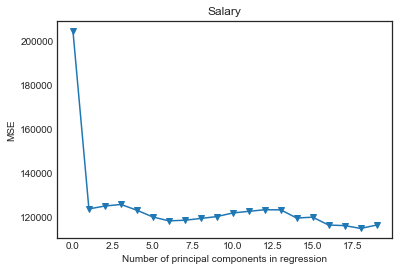

In [47]:
n = len(X_reduced)
# 10-fold CV
kf_10 = model_selection.KFold(n_splits=10)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
# y.ravel(): return a contiguous flattened array.
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20): # from 1 to 19
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [48]:
mse

[204591.76410552746,
 123924.13089980235,
 125219.8186020469,
 125936.4971858609,
 123338.38059497128,
 120267.60729131899,
 118508.15848939036,
 118789.33335711624,
 119588.53890740131,
 120446.21349148313,
 122072.10474467053,
 122818.16267921469,
 123533.98633524492,
 123501.98662363985,
 119791.38051645881,
 120171.99674286325,
 116609.51312630426,
 116359.68557326551,
 115083.91154069177,
 116599.0136738026]

The above plot indicates that the lowest training MSE is reached when doing regression on 18 components.

In [49]:
regr_test = LinearRegression()
regr_test.fit(X_reduced[:,:18], y) # 18 components: from 0 to 17 components
regr_test.coef_

array([ 106.36859204,  -21.60350456,   24.2942534 ,  -36.9858579 ,
        -58.41402748,   62.20632652,   24.63862038,   15.82817701,
         29.57680773,   99.64801199,  -30.11209105,   20.99269291,
         72.40210574, -276.68551696,  -74.17098665,  422.72580227,
       -347.05662353, -561.59691587])

### Fitting PCA with training data
This approach is better than the previous one since it determines # of principal components only using train dataset

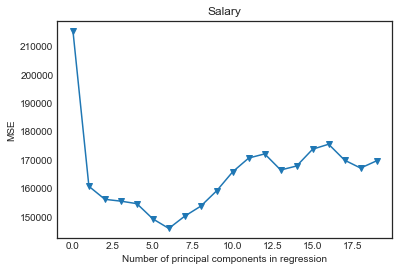

In [50]:
pca2 = PCA()
X_reduced_train = pca2.fit_transform(X_train_std)

n = len(X_reduced_train)
kf_10 = model_selection.KFold(n_splits=10)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

The above plot indicates that the lowest training MSE is reached when doing regression on 6 components.

#### Transform test data with PCA loadings and fit regression on 6 principal components

In [51]:
X_reduced_test = pca2.transform(X_test_std)[:,:6]  # 6 components: from 0 to 5

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:6], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

96587.9206957096

### 6.7.2 Partial Least Squares

See documentation:
http://scikit-learn.org/dev/modules/generated/sklearn.cross_decomposition.PLSRegression.html#sklearn.cross_decomposition.PLSRegression

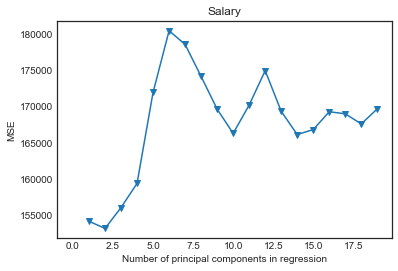

In [52]:
# 10-fold CV
kf_10 = model_selection.KFold(n_splits=10)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)  # n_components: Number of components to keep
    score = model_selection.cross_val_score(pls, X_train_std, y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [53]:
pls = PLSRegression(n_components=2) # when # of principal components = 2, produced the best result from above figure.
pls.fit(X_train_std, y_train)

mean_squared_error(y_test, pls.predict(X_test_std)) # the result is slightly worse than PCR result

101417.46102410383